# Problem Scenario

### Working on two datasets from different types, and prepare them to extract what can be extracted from the relationships linking each element to the other in each data set, and then combine them and prepare them for a machine learning model.

# Problem  Objective:

### Extract data from various sources &  Data transformation:
•	csv files
•	json files
•	API 

•	combining data from different sources
•	data cleaning
•	data types
•	parsing dates
•	file encodings
•	missing data
•	duplicate data
•	dummy variables
•	remove outliers
•	scaling features
•	engineering features


# Step I: Import Libraries

In [300]:
#!pip install xlrd


In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timezone
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from scipy.stats import zscore


# Step II: Read the Data

In [302]:
df = pd.read_excel(r'C:\Users\USER\Documents\RMG\all.xls')
df2 =pd.read_excel(r'C:\Users\USER\Documents\RMG\Second_cleaned_data_API.xlsx')

#  Step III: Data Cleaning + Preprocessing

In [303]:

df.head()

,"World Bank Projects, data as of 02/12/2024 23:00:02 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P504999,Europe and Central Asia,Ukraine,Pipeline,NaN,Delivering Resilient Infrastructure in Vulnera...,NaN,NaN,NaN,http://projects.worldbank.org/P504999/null?lan...,...,NaN,NaN,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P504899,Latin America and Caribbean,Federative Republic of Brazil,Pipeline,NaN,SPQualificaSUAS,NaN,NaN,NaN,http://projects.worldbank.org/P504899/null?lan...,...,NaN,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P504897,Latin America and Caribbean,Federative Republic of Brazil,Pipeline,NaN,BahiaVidaMelhor,NaN,NaN,NaN,http://projects.worldbank.org/P504897/null?lan...,...,NaN,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the unnamed row + assign the header

In [304]:
df.columns = df.iloc[0]
df = df[2:]

In [305]:
df.columns

Index(['Project ID', 'Region', 'Country', 'Project Status',
       'Last Stage Reached Name', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object', name=0)

### Set the Index

In [306]:
df['Project ID'].is_unique

True

In [307]:
df.index = df.index.astype(str)

In [308]:
df.set_index('Project ID', inplace=True)

### Get the total of null values in the dataframe:

In [309]:
df[df.columns[df.isnull().any()]].isnull().sum()

0
Region                                  69
Country                                 69
Project Status                          69
Last Stage Reached Name               6359
Project Name                            66
Project Development Objective        10218
Implementing Agency                  15122
Consultant Services Required         20654
Project URL                             66
Board Approval Date                   2861
Project Closing Date                  5175
Financing Type                        8595
Current Project Cost                   225
IBRD Commitment                         66
IDA Commitment                          66
Total IDA and IBRD Commitment           66
Grant Amount                         19868
Borrower                             15363
Lending Instrument                     310
Environmental Assessment Category     9286
Environmental and Social Risk        20615
Sector 1                              1966
Sector 2                             10518
Sector 3 

In [310]:
df['Environmental Assessment Category'].unique()

array([nan, 'B', 'C', 'H', 'A', 'F', 'U', 'D'], dtype=object)

### Drop the unnecessary data columns and check if there are any missing values.

In [311]:
df1 = df.drop(['Region','Country','Sector 1','Sector 2','Sector 3','Theme 1','Theme 2','Environmental and Social Risk','Lending Instrument','Borrower','Grant Amount','Consultant Services Required','Implementing Agency','Project Development Objective ','Last Stage Reached Name','Project Name','Country','Project URL','Total IDA and IBRD Commitment'], axis =1)

In [312]:
df1.shape

(22350, 8)

In [313]:
df1[df1.columns[df1.isnull().any()]].isnull().sum()

0
Project Status                         69
Board Approval Date                  2861
Project Closing Date                 5175
Financing Type                       8595
Current Project Cost                  225
IBRD Commitment                        66
IDA Commitment                         66
Environmental Assessment Category    9286
dtype: int64

### Drop all non values

In [314]:
df11 = df1.dropna()


In [315]:
df11.shape

(8926, 8)

In [316]:
df11.isnull().sum()

0
Project Status                       0
Board Approval Date                  0
Project Closing Date                 0
Financing Type                       0
Current Project Cost                 0
IBRD Commitment                      0
IDA Commitment                       0
Environmental Assessment Category    0
dtype: int64

### Reformat the data

In [317]:
df11['Board Approval Date'] = pd.to_datetime(df11['Board Approval Date'])
df11['Project Closing Date'] = pd.to_datetime(df11['Project Closing Date'])
df11['Current Project Cost'] = df11['Current Project Cost'].astype('int64')
df11['IBRD Commitment '] = df11['IBRD Commitment '].astype('int64')
df11['IDA Commitment'] = df11['IDA Commitment'].astype('int64')

In [318]:
df11.dtypes

0
Project Status                                    object
Board Approval Date                  datetime64[ns, UTC]
Project Closing Date                      datetime64[ns]
Financing Type                                    object
Current Project Cost                               int64
IBRD Commitment                                    int64
IDA Commitment                                     int64
Environmental Assessment Category                 object
dtype: object

### Calculate projects duration by day + set a new column called Project_Time

In [319]:
df11['Board Approval Date'] = df11['Board Approval Date'].dt.tz_localize(None)

df11['Project_Time'] = (df11['Project Closing Date'] - df11['Board Approval Date']).dt.days

In [320]:
df11.shape


(8926, 9)

### Drop unnecessary columns

In [321]:
df12 = df11.drop(['Board Approval Date', 'Project Closing Date'], axis = 1)

### Remove outlires 

In [322]:
df12['zscore Current Project Cost'] = zscore(df12['Current Project Cost'])

In [323]:
threshold = 4
df12['outliers'] = np.where((df12['zscore Current Project Cost'] - threshold > 0), True, np.where(df12['zscore Current Project Cost'] + threshold < 0,True,False))

In [324]:
df12.describe()

,Current Project Cost,IBRD Commitment,IDA Commitment,Project_Time,zscore Current Project Cost
count,8.926000e+03,8.926000e+03,8.926000e+03,8926.000000,8.926000e+03
mean,1.577833e+08,4.188195e+07,2.946970e+07,2202.214766,1.990093e-17
std,6.431414e+08,1.240507e+08,6.887115e+07,972.058381,1.000056e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1271.000000,-2.453459e-01
25%,1.100000e+07,0.000000e+00,0.000000e+00,1584.500000,-2.282414e-01
50%,4.000000e+07,0.000000e+00,0.000000e+00,2225.000000,-1.831477e-01
75%,1.293125e+08,2.500000e+07,2.840000e+07,2793.750000,-4.427075e-02
max,2.983330e+10,3.750000e+09,1.200000e+09,8093.000000,4.614410e+01


In [325]:
df12.drop((df12[df12['outliers']==True]).index,inplace = True)

In [326]:
df12.shape

(8882, 9)

# Step IV: EDA (Exploratory Data Analysis)

In [327]:
fig = px.box(df12,x=df12['Project_Time'],title='Project_Time')
fig.show()

### Project_Time by Financing Typ

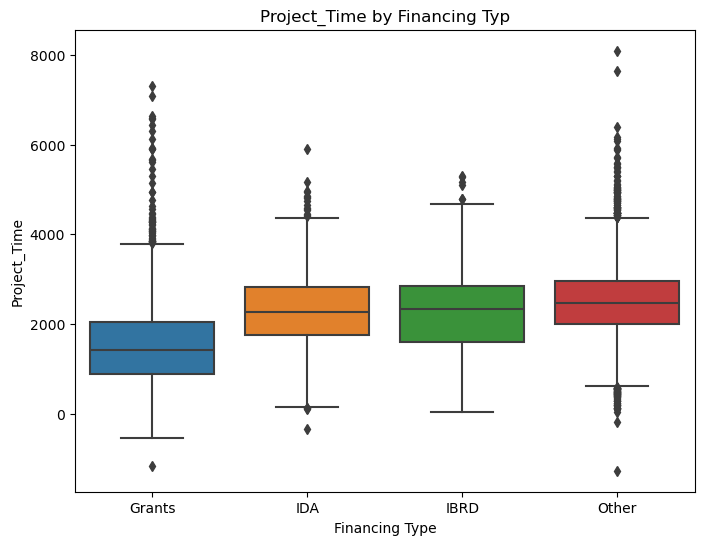

In [328]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Financing Type', y='Project_Time', data=df12)
plt.title('Project_Time by Financing Typ')
plt.show()

### Project_Time oulier 

<Axes: ylabel='Project_Time'>

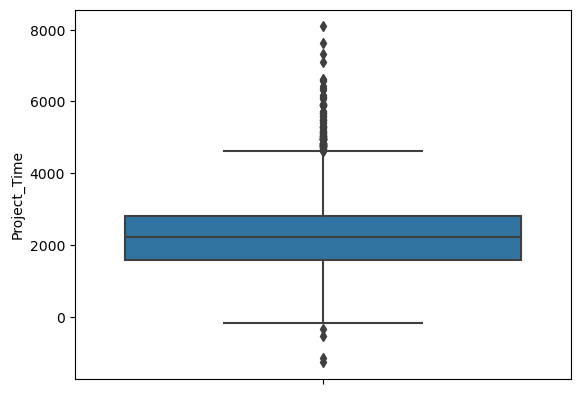

In [329]:
sns.boxplot( y='Project_Time', data=df12)


### Project_Time by Environmental Assessment Categoryp outlier

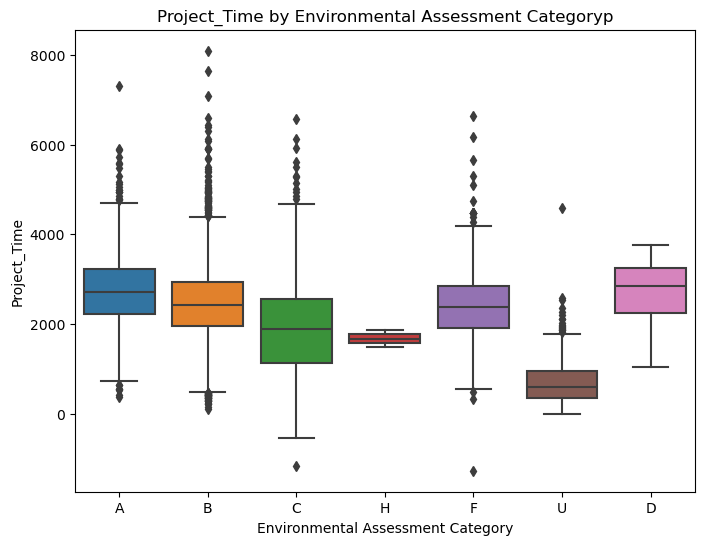

In [330]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Environmental Assessment Category', y='Project_Time', data=df12)
plt.title('Project_Time by Environmental Assessment Categoryp')
plt.show()


### Frequency of Environmental Assessment Categories 

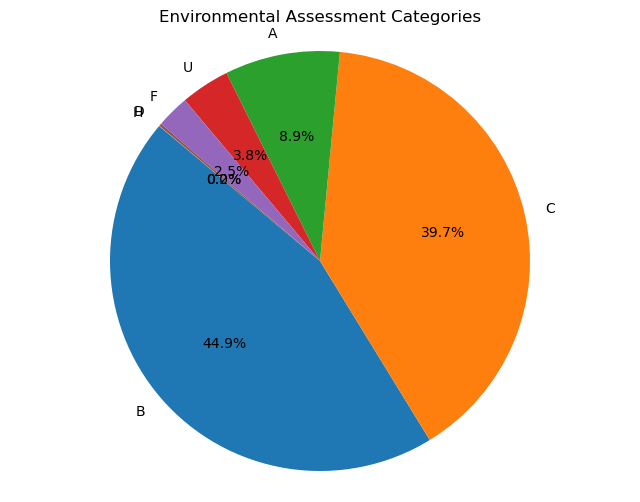

In [331]:

# Count the frequency of each unique value in the column
category_counts = df['Environmental Assessment Category'].value_counts()

# Create labels and sizes for the pie chart
labels = category_counts.index.tolist()
sizes = category_counts.values.tolist()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Environmental Assessment Categories')
plt.show()


### Frequency of Financing Types

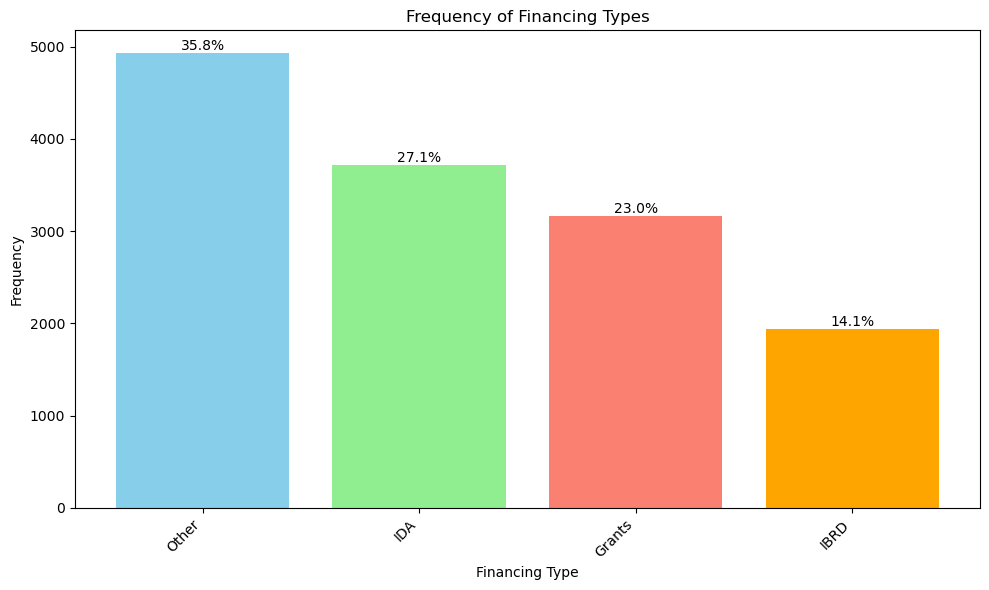

In [332]:
import matplotlib.pyplot as plt

# Count the frequency of each unique value in the column
category_counts = df['Financing Type'].value_counts()

# Calculate percentages
total_count = category_counts.sum()
percentages = [(count / total_count) * 100 for count in category_counts.values]

# Create labels and sizes for the bar chart
labels = category_counts.index.tolist()
sizes = category_counts.values.tolist()

# Define colors for each bar
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=colors)

# Add percentages as annotations on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Financing Type')
plt.ylabel('Frequency')
plt.title('Frequency of Financing Types')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Get the dummies

In [333]:
df_final = pd.get_dummies(df12, columns= ['Project Status','Financing Type','Environmental Assessment Category'],drop_first= True)

In [334]:
df_final = df_final.astype(int)

In [335]:
df_final

,Current Project Cost,IBRD Commitment,IDA Commitment,Project_Time,zscore Current Project Cost,outliers,Project Status_Closed,Financing Type_IBRD,Financing Type_IDA,Financing Type_Other,Environmental Assessment Category_B,Environmental Assessment Category_C,Environmental Assessment Category_D,Environmental Assessment Category_F,Environmental Assessment Category_H,Environmental Assessment Category_U
Project ID,,,,,,,,,,,,,,,,
P177398,497000000,439500000,0,2248,0,0,0,0,0,0,0,0,0,0,0,0
P177210,120000000,0,120000000,2197,0,0,0,0,1,0,1,0,0,0,0,0
P177053,50000000,0,50000000,1440,0,0,0,0,1,0,1,0,0,0,0,0
P177041,150000000,0,150000000,2714,0,0,0,0,1,0,0,0,0,0,0,0
P177038,100000000,98000000,0,644,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P000035,65000000,0,45600000,3552,0,0,1,0,0,1,0,1,0,0,0,0
P000034,32100000,0,37700000,2815,0,0,1,0,1,0,0,1,0,0,0,0
P000017,6100000,0,5500000,2782,0,0,1,0,1,0,0,1,0,0,0,0


### Heatmap: red (negative correlation) through white (no correlation) to blue (positive correlation).

<Axes: >

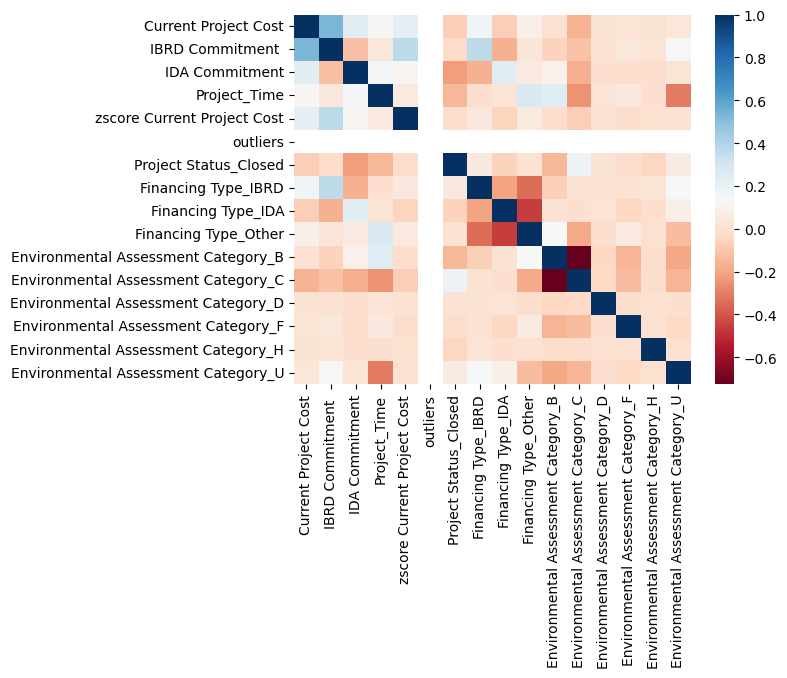

In [336]:
corr = df_final.corr()
import matplotlib.colors as mcolors

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False

# Create a heatmap 
sns.heatmap(corr, cmap='RdBu', mask=mask,cbar=True)

In [337]:
df_final.columns


Index(['Current Project Cost', 'IBRD Commitment ', 'IDA Commitment',
       'Project_Time', 'zscore Current Project Cost', 'outliers',
       'Project Status_Closed', 'Financing Type_IBRD', 'Financing Type_IDA',
       'Financing Type_Other', 'Environmental Assessment Category_B',
       'Environmental Assessment Category_C',
       'Environmental Assessment Category_D',
       'Environmental Assessment Category_F',
       'Environmental Assessment Category_H',
       'Environmental Assessment Category_U'],
      dtype='object')

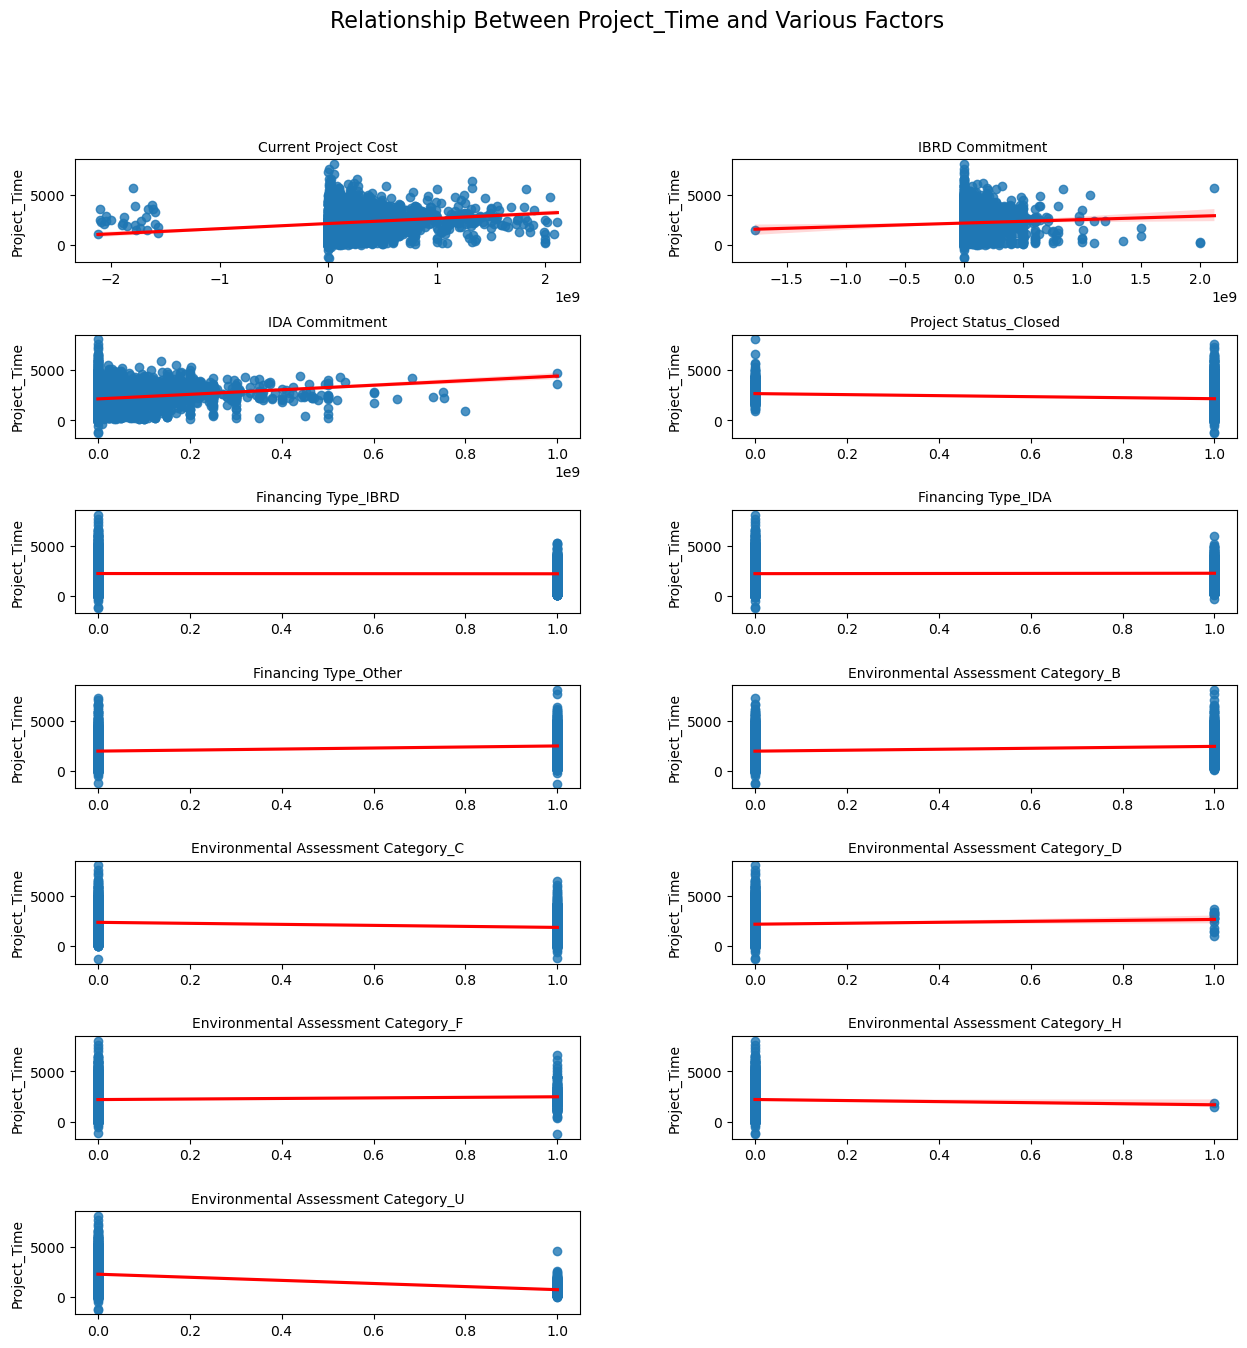

In [338]:

# List of columns to include in the pair plot
columns_to_plot = ['Current Project Cost', 'IBRD Commitment ', 'IDA Commitment',
       'Project_Time', 'Project Status_Closed', 'Financing Type_IBRD',
       'Financing Type_IDA', 'Financing Type_Other',
       'Environmental Assessment Category_B',
       'Environmental Assessment Category_C',
       'Environmental Assessment Category_D',
       'Environmental Assessment Category_F',
       'Environmental Assessment Category_H',
       'Environmental Assessment Category_U']
# Create a DataFrame with the selected columns
data_to_plot = df_final[columns_to_plot]

# Define the target variable
y = 'Project_Time'

# Extract the independent variables
independent_vars = ['Current Project Cost', 'IBRD Commitment ', 'IDA Commitment',
       'Project Status_Closed', 'Financing Type_IBRD',
       'Financing Type_IDA', 'Financing Type_Other',
       'Environmental Assessment Category_B',
       'Environmental Assessment Category_C',
       'Environmental Assessment Category_D',
       'Environmental Assessment Category_F',
       'Environmental Assessment Category_H',
       'Environmental Assessment Category_U']

# Calculate the number of rows and columns for subplots
num_rows = len(independent_vars) // 2 + 1
num_cols = 2

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through the independent variables and create scatter plots
for i, var in enumerate(independent_vars):
    row = i // 2
    col = i % 2
    sns.regplot(x=var, y=y, data=data_to_plot, ax=ax[row, col], line_kws={'color': 'red'})
    ax[row, col].set_title(var, size=10)
    ax[row, col].set_xlabel('')

# Remove any empty subplots
for i in range(len(independent_vars), num_rows * num_cols):
    fig.delaxes(ax[i // 2, i % 2])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.7)

# Set the main title
fig.suptitle('Relationship Between Project_Time and Various Factors', size=16)

# Show the plot
plt.show()


In [339]:
df_final.dtypes

Current Project Cost                   int32
IBRD Commitment                        int32
IDA Commitment                         int32
Project_Time                           int32
zscore Current Project Cost            int32
outliers                               int32
Project Status_Closed                  int32
Financing Type_IBRD                    int32
Financing Type_IDA                     int32
Financing Type_Other                   int32
Environmental Assessment Category_B    int32
Environmental Assessment Category_C    int32
Environmental Assessment Category_D    int32
Environmental Assessment Category_F    int32
Environmental Assessment Category_H    int32
Environmental Assessment Category_U    int32
dtype: object

### Prepare the data for the Model

In [340]:
df_ML = df_final.drop(['outliers'],axis = 1)
df_ML = df_final.drop(['zscore Current Project Cost'],axis = 1)

# Step V:  Fit the Model and Evaluate Performance

In [341]:
x = df_ML.drop(['Current Project Cost'], axis =1)
y = df_ML['Current Project Cost']

### MinMaxScaler & StandarScaler

In [342]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [343]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [344]:
df_MM = trans_MM.fit_transform(x)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.567234,0.0000,0.375801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.454389,0.1200,0.370355,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.454389,0.0500,0.289513,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.454389,0.1500,0.425566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.479551,0.0000,0.204507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,0.454389,0.0456,0.515058,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8878,0.454389,0.0377,0.436352,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8879,0.454389,0.0055,0.432828,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8880,0.454389,0.0000,0.351452,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [345]:
df_SS = trans_SS.fit_transform(x)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.628624,-0.440593,0.046668,0.0,-3.198253,-0.395043,-0.528987,-0.873900,-0.953996,-0.760382,-0.042481,-0.165215,-0.015008,-0.203741
1,-0.361566,1.397653,-0.005768,0.0,-3.198253,-0.395043,1.890406,-0.873900,1.048223,-0.760382,-0.042481,-0.165215,-0.015008,-0.203741
2,-0.361566,0.325343,-0.784079,0.0,-3.198253,-0.395043,1.890406,-0.873900,1.048223,-0.760382,-0.042481,-0.165215,-0.015008,-0.203741
3,-0.361566,1.857215,0.525787,0.0,-3.198253,-0.395043,1.890406,-0.873900,-0.953996,-0.760382,-0.042481,-0.165215,-0.015008,-0.203741
4,0.528169,-0.440593,-1.602489,0.0,0.312671,-0.395043,-0.528987,-0.873900,1.048223,-0.760382,-0.042481,-0.165215,-0.015008,-0.203741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,-0.361566,0.257940,1.387379,0.0,0.312671,-0.395043,-0.528987,1.144296,-0.953996,1.315129,-0.042481,-0.165215,-0.015008,-0.203741
8878,-0.361566,0.136922,0.629630,0.0,0.312671,-0.395043,1.890406,-0.873900,-0.953996,1.315129,-0.042481,-0.165215,-0.015008,-0.203741
8879,-0.361566,-0.356340,0.595701,0.0,0.312671,-0.395043,1.890406,-0.873900,-0.953996,1.315129,-0.042481,-0.165215,-0.015008,-0.203741
8880,-0.361566,-0.440593,-0.187751,0.0,0.312671,-0.395043,-0.528987,1.144296,-0.953996,1.315129,-0.042481,-0.165215,-0.015008,-0.203741


In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(x, y, random_state=0, test_size=0.20)


In [347]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_train = X_train.apply(pd.to_numeric, errors='coerce')

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.dtype)
print(y_train.dtype)
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

int32
int32
0
0
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):       -153845171949.334
Model:                            OLS   Adj. R-squared (uncentered):  -154127178045.689
Method:                 Least Squares   F-statistic:                             -545.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                        1.00
Time:                        15:06:46   Log-Likelihood:                     -1.4562e+05
No. Observations:                7105   AIC:                                  2.913e+05
Df Residuals:                    7092   BIC:                                  2.914e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [348]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [349]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test.values)

X_test = pd.DataFrame(X_test)  # Convert X_test to a pandas DataFrame
X_test = X_test.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN
X_test = np.asarray(X_test)  # Convert X_test to a numpy array

y_pred_test = reg.predict(X_test)  # Predict using the trained model

In [350]:
print("R Square: {}".format(r2_score(y_train, y_pred_train)))
print("MAE: {}".format(mean_absolute_error(y_train, y_pred_train)))
print("MSE: {}".format(mean_squared_error(y_train, y_pred_train)))

R Square: 0.3700826807066292
MAE: 62160062.20781624
MSE: 3.7007533514074904e+16
